# **Credit Card Fraud Detection - Random Forest**

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd


# **Get Data**

In [ ]:
data = pd.read_csv('creditcard.csv')

# **Display Data**

In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,...,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21877.000000,21877.000000
mean,16924.271551,-0.241060,0.222124,0.737915,0.262153,-0.175227,0.087496,-0.141011,0.019339,0.562079,...,-0.043038,-0.140156,-0.037826,0.010707,0.125683,0.029305,0.011978,0.006293,71.725300,0.003931
std,11005.409549,1.880901,1.518111,1.740947,1.451072,1.414872,1.322606,1.323924,1.383927,1.277273,...,0.849611,0.644914,0.512947,0.590807,0.436855,0.524399,0.395178,0.247253,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5496.250000,-0.960913,-0.350012,0.298029,-0.649075,-0.756733,-0.660688,-0.597972,-0.169171,-0.273362,...,-0.257010,-0.564567,-0.175530,-0.331558,-0.136296,-0.339574,-0.067305,-0.010143,5.990000,0.000000
50%,18770.500000,-0.299205,0.206484,0.888730,0.222271,-0.210143,-0.176618,-0.069763,0.026032,0.515162,...,-0.109913,-0.111903,-0.048576,0.062115,0.163900,-0.042054,0.005402,0.019665,17.430000,0.000000
75%,27778.750000,1.164867,0.858497,1.520365,1.132694,0.332839,0.481047,0.447633,0.281472,1.330385,...,0.059938,0.267688,0.074156,0.399318,0.404503,0.320185,0.095819,0.077587,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [ ]:
print('Valid transaction',len(data[data['Class']==0]))
print('fraud transaction',len(data[data['Class']==1]))

Valid transaction 21791
fraud transaction 86


In [ ]:
y= data['Class']
x= data.drop(columns=['Class'],axis=1)

In [ ]:
#splitting the data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [ ]:
# fitting randomforest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
#model_1
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
import pandas as pd

if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

x_test = x_test[y_test.notna()].reset_index(drop=True)
y_test = y_test[y_test.notna()].reset_index(drop=True)

In [ ]:
#model_2
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [ ]:
y_pred_2 = classifier.predict(x_test)

In [ ]:
# Regenerating y_pred_2 with the corrected x_test
y_pred_2 = classifier.predict(x_test)

from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred_2))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6534
         1.0       1.00      0.86      0.93        29

    accuracy                           1.00      6563
   macro avg       1.00      0.93      0.96      6563
weighted avg       1.00      1.00      1.00      6563

Confusion matrix:
 [[6534    0]
 [   4   25]]


In [ ]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

resampling = RandomUnderSampler()
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

pipeline = Pipeline([('RandomUnderSampler', resampling), ('RF', model)])
pipeline.fit(x_train, y_train)
predicted = pipeline.predict(x_test)

print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6534
         1.0       0.19      1.00      0.32        29

    accuracy                           0.98      6563
   macro avg       0.60      0.99      0.66      6563
weighted avg       1.00      0.98      0.99      6563

Confusion matrix:
 [[6413  121]
 [   0   29]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler
resampling = RandomOverSampler()
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

pipeline = Pipeline([('RandomOverSampler', resampling), ('RF', model)])
pipeline.fit(x_train, y_train)
predicted = pipeline.predict(x_test)

print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6534
         1.0       1.00      0.90      0.95        29

    accuracy                           1.00      6563
   macro avg       1.00      0.95      0.97      6563
weighted avg       1.00      1.00      1.00      6563

Confusion matrix:
 [[6534    0]
 [   3   26]]


In [ ]:
from imblearn.over_sampling import SMOTE
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

pipeline = Pipeline([('SMOTE', resampling), ('RF', model)])
pipeline.fit(x_train, y_train)
predicted = pipeline.predict(x_test)

print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6534
         1.0       0.97      1.00      0.98        29

    accuracy                           1.00      6563
   macro avg       0.98      1.00      0.99      6563
weighted avg       1.00      1.00      1.00      6563

Confusion matrix:
 [[6533    1]
 [   0   29]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###**visulalizing the confusion matrix**

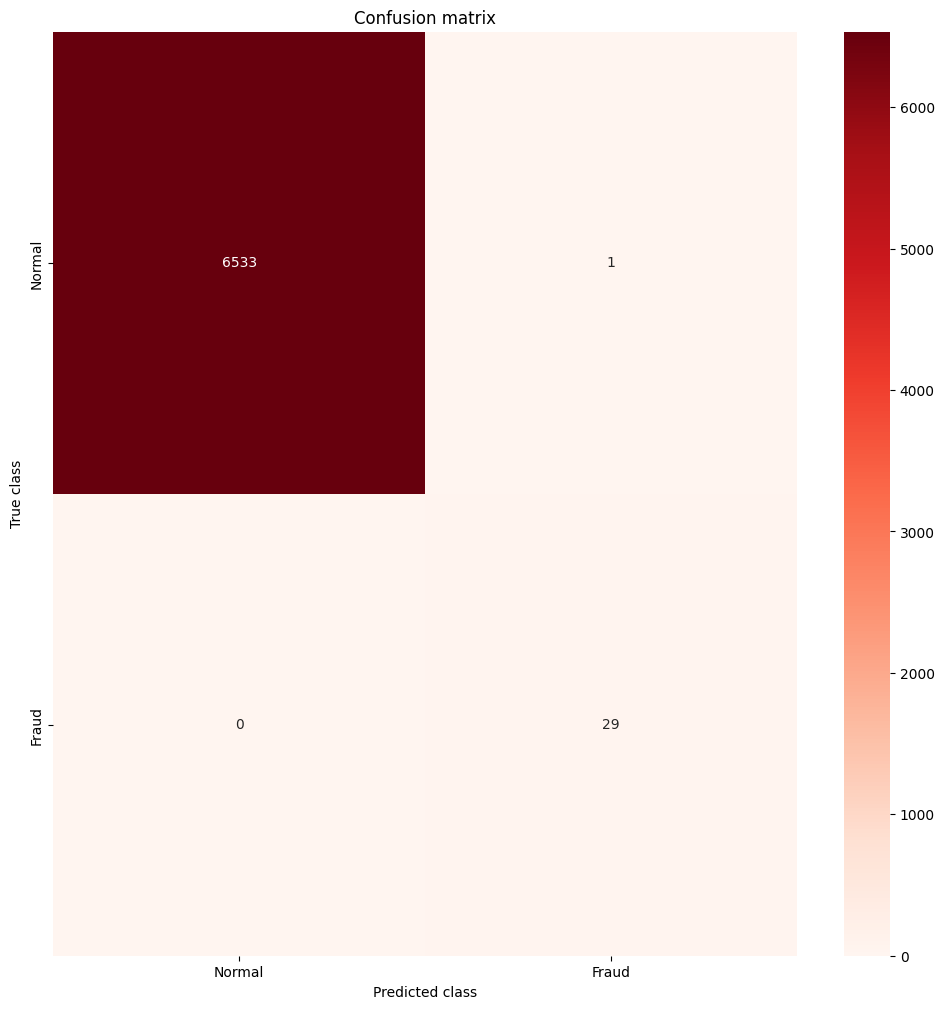

In [ ]:
#visulalizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
y_pred = pipeline.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d", cmap = "Reds");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()